In [ ]:
####################################################
# This is a scratchpad for analysis of intermediate results in the CGMBrush library.
####################################################

# NOTE: Always clear results before checking in a jupyter notebook. This improves diff's.

from cgmbrush.cgmbrush import *
import matplotlib.colors as colors
from cgmbrush.cosmology import cosmology as cosmo
from cgmbrush.cosmology import halo as halo

%matplotlib inline


In [ ]:
###################################################
# Profile Mask Visualizer
###################################################
def view_mask(profile: CGMProfile, mass):

    provider = BolshoiProvider()

    # pick some parameters
    redshift = 0 
    resolution = 16
    cellsize = provider.Lbox / (provider.halofieldresolution * resolution)
    print("cellsize (kpc): %s" % (cellsize * 1000))
    fine_mask_len = 20 * resolution
    fine_mask_len_small = 2 * resolution

    comoving_rvir = halo.comoving_rvir(cosmo, mass, redshift)
    print("co-moving virial radius (kpc): %s" % (comoving_rvir * 1000))

    mask = profile.get_mask(mass, comoving_rvir, redshift, resolution, 1, cellsize, fine_mask_len)
    mask_small = profile.get_mask(mass, comoving_rvir, redshift, resolution, 1, cellsize, fine_mask_len_small)
    fig, ax = plt.subplots(1,2,figsize=(24, 12))
    pos = ax[0].imshow(mask)
    pos = ax[1].imshow(mask_small)
    ax[0].title.set_text('{} Profile, M=${:.1e}$'.format(profile.name, mass))
    ax[1].title.set_text('{} Profile (zoomed), M=${:.1e}$'.format(profile.name, mass))
    fig.colorbar(pos, ax=ax)

# Choose a profile and mass
view_mask(FireProfile(), 1E10) 
view_mask(FireProfile(), 1E14) 
view_mask(NFWProfile(), 1E10) 
view_mask(NFWProfile(), 1E14) 

In [ ]:
from cgmbrush import *
def compareRadii(mass, z):
    print("Mass {:.1e}, z={}".format(mass, z))
    a = halo.comoving_rvir(cosmo, mass, z)
    b = halo.r200Mz(cosmo, mass, z)
    print('  rVir:\t{:.4f} Mpc'.format(a))
    print('  r200:\t{:.4f} Mpc'.format(b))
    print('  difference:\t{:.1f}%'.format((abs(b-a)) * 100 / b))

masses = [1E10,1E13,1E15]
redshifts = [0,0.5,1,2]

for z in redshifts:
    for m in masses:
        compareRadii(m, z)

In [ ]:
####################################################
# Get a feel for halo masses for the simulation
####################################################
p = BolshoiProvider()
halos = p.get_halos(0)
print('Max: {:.2e}'.format(max(halos['Mvir'])))
print(np.percentile(halos['Mvir'], [50,80,95,99,99.9,99.99,99.999]))


10.0 massFire in 1e12 =  0.00984115655581405  truth =  0.01  ratio = 0.9841156555814049
10.0 massPercip in 1e12 =  0.009883011880274257  truth =  0.01  ratio = 0.9883011880274257
11.0 massFire in 1e12 =  0.09837770237773719  truth =  0.1  ratio = 0.9837770237773719
11.0 massPercip in 1e12 =  0.1006206425652474  truth =  0.1  ratio = 1.006206425652474
12.0 massFire in 1e12 =  0.9831657887053615  truth =  1.0  ratio = 0.9831657887053615
12.0 massPercip in 1e12 =  1.0038436797931354  truth =  1.0  ratio = 1.0038436797931354
13.0 massFire in 1e12 =  9.816607146617871  truth =  10.0  ratio = 0.9816607146617871
13.0 massPercip in 1e12 =  9.932629627503939  truth =  10.0  ratio = 0.9932629627503939
14.0 massFire in 1e12 =  97.91285172241874  truth =  100.0  ratio = 0.9791285172241874
14.0 massPercip in 1e12 =  99.98676920634504  truth =  100.0  ratio = 0.9998676920634505
15.0 massFire in 1e12 =  977.3594444731859  truth =  1000.0  ratio = 0.9773594444731859
15.0 massPercip in 1e12 =  1006.851

(0.01, 3)

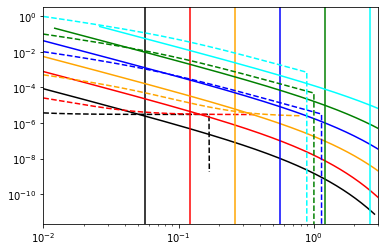

In [2]:
###################################################################################################
#Simplified code that calculates the mass within the analytic profile 
#Currently it does this for fire and percipitation but can be easily generalized
#
#The vertical lines are the virial radius
###################################################################################################
from cgmbrush.cgmbrush import *
%matplotlib inline
import numpy as np
import cgmbrush.plots.plotting_routines as makefig

redshift = 0
#df = provider.get_halos(redshift)
#df, bin_markers = create_halo_array_for_convolution(df, 10**10, 9*10**15, 30)

massfactor =   1/cosmo.fb*mu*mprot/msun*(Mpc)**3

fp = FireProfile()
percip = PrecipitationProfile()
color = ['black','red', 'orange', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'brown']
nummass=6
i=0
for Mvir_avg in np.logspace(10, 15, nummass):

    rvir = halo.comoving_rvir(cosmo, Mvir_avg, redshift)
    rvalsFire, densityFire = fp.get_analytic_profile(Mvir_avg, redshift)
    rvalsPercip, densityPercip = percip.get_analytic_profile(Mvir_avg, redshift)


    totalmassanalyticFire = 4.*np.pi*np.sum(rvalsFire[1:]**2*densityFire[1:] *(rvalsFire[1:] - rvalsFire[:-1]))
    totalmassanalyticPercip = 4.*np.pi*np.sum(rvalsPercip[1:]**2*densityPercip[1:]*(rvalsPercip[1:] - rvalsPercip[:-1]))
    
    totalmassanalyticFire *= massfactor
    totalmassanalyticPercip *= massfactor
    print(np.log10(Mvir_avg), "massFire in 1e12 = ", totalmassanalyticFire/1e12, " truth = ", Mvir_avg/1e12, " ratio =", totalmassanalyticFire/Mvir_avg)
    print(np.log10(Mvir_avg), "massPercip in 1e12 = ", totalmassanalyticPercip/1e12,  " truth = ",  Mvir_avg/1e12,  " ratio =", totalmassanalyticPercip/Mvir_avg)
    

    plt.loglog(rvalsFire, densityFire, color=color[i%nummass])
    plt.loglog(rvalsPercip, densityPercip, '--', color=color[i%nummass])
    plt.axvline(rvir, color=color[i%nummass])
    i+=1
        

plt.xlim([.01,3])